<a href="https://colab.research.google.com/github/elfavci/GMKA_Elif_Avci/blob/main/goruntuIslemeProje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.datasets import fetch_openml
from skimage.filters import threshold_otsu
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10 #veri kümesi
from sklearn.model_selection import train_test_split  #veri kümesini böler
from tensorflow.keras.models import Sequential #yapay sinir ağı modeli
#giriş katmanından başlayarak sıralı olarak birbirini takip eden katmanlar eklenir ve çıktı katmanına kadar devam eder.
from tensorflow.keras.layers import Conv2D #2 boyutlu veriler üzerine evrişim işlemi gerçekleştirilir.
from tensorflow.keras.layers import MaxPooling2D #önemli özellikleri korumak için kullanılır.
from tensorflow.keras.layers import Flatten #tek boyutlu veriye dönüştürür
from tensorflow.keras.layers import Dense #full connected bağlantıları temsil eder.

#çıktı aktivasyon fonksinumuz.

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

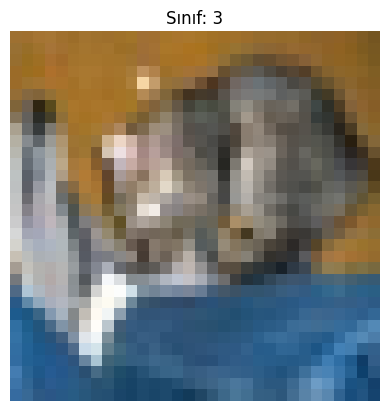

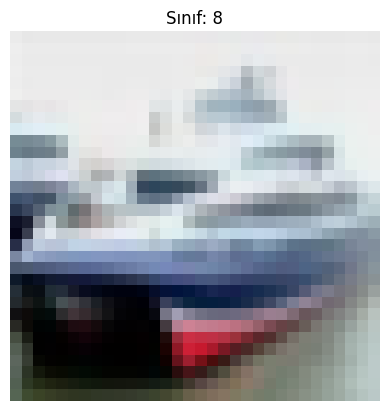

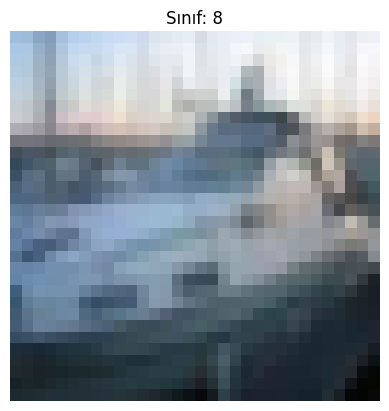

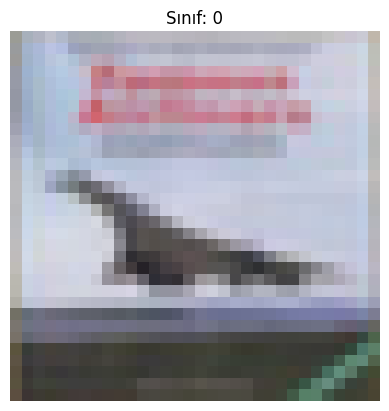

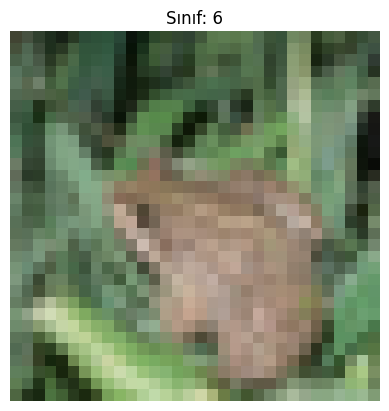

In [4]:
#veri setindekn örnek resim gösterme

for i in range(5):
  plt.imshow(x_test[i])
  plt.title("Sınıf: "+str(y_test[i][0]))
  plt.axis("off")
  plt.show()

y =  [9]


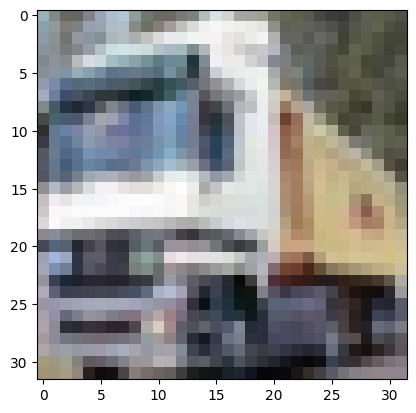

In [5]:
# Veri setinden örnek görüntü ve çıktı
plt.imshow(x_train[1])
print("y = ",y_train[1])

In [6]:
#eğitim ve test verilerinin birleştirilmesi:
x_data=np.concatenate((x_train,x_test),axis=0)
y_data=np.concatenate((y_train,y_test),axis=0)

In [7]:
len(x_data)

60000

In [8]:
len(y_data)

60000

In [9]:
x_data[100]

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]

In [10]:
y_data[100]
#100 nolu resim 8 numaralı etiketli resmi temsil ediyor.

array([8], dtype=uint8)

In [11]:
#eğitim ve test verisi olarak bölme:
#veriyi train ve  test olarak bölme:
#%80 ini eğitim verisi %20 sini test verisi olarak bölecek.Random state =42 olarak verilen değer

x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)


In [12]:
len(x_train)

48000

In [13]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [253, 253, 253],
        [250, 250, 250],
        ...,
        [249, 249, 249],
        [253, 253, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [252, 252, 252],
        [254, 254, 254],
        [255, 255, 255]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [14]:
y_train[0]

array([3], dtype=uint8)

In [15]:
60000*0.8

48000.0

In [16]:
len(x_test)

12000

In [17]:
len(y_test)

12000

In [18]:
y_test

array([[1],
       [9],
       [2],
       ...,
       [1],
       [8],
       [1]], dtype=uint8)

In [19]:
#verileri 0-1 arasında normalize edilmesi
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

In [20]:
x_train[100]

array([[[0.3254902 , 0.34509805, 0.4       ],
        [0.3254902 , 0.34117648, 0.39607844],
        [0.34509805, 0.3647059 , 0.41960785],
        ...,
        [0.6431373 , 0.6392157 , 0.61960787],
        [0.6313726 , 0.627451  , 0.60784316],
        [0.61960787, 0.61960787, 0.6       ]],

       [[0.38039216, 0.38039216, 0.4117647 ],
        [0.4       , 0.4       , 0.43137255],
        [0.40392157, 0.40392157, 0.4392157 ],
        ...,
        [0.67058825, 0.654902  , 0.6313726 ],
        [0.65882355, 0.6431373 , 0.61960787],
        [0.6509804 , 0.63529414, 0.6117647 ]],

       [[0.43137255, 0.41568628, 0.42745098],
        [0.44705883, 0.43137255, 0.44313726],
        [0.45490196, 0.4392157 , 0.45490196],
        ...,
        [0.7019608 , 0.6666667 , 0.63529414],
        [0.6862745 , 0.6509804 , 0.62352943],
        [0.6784314 , 0.64705884, 0.6156863 ]],

       ...,

       [[0.05490196, 0.01568628, 0.01960784],
        [0.05098039, 0.00784314, 0.00392157],
        [0.06666667, 0

In [21]:
#one hot encoding yöntemi:
num_classes=10
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [22]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
x_train.shape[1::]

(32, 32, 3)

In [24]:
#cnn algoritmasının kurulması

#CNN MODEL

model=Sequential()

model.add(Conv2D(32,(3,3),activation="relu",padding="same",input_shape=x_train.shape[1:])) #3*3 lük filtre uygulandı
#:negatif değerleri sıfır yapar pozitif kısımları korur
#padding:çıktı boyutunun giriş boyutuna benzerliği sağlar
#giriş kanal sayısı: 3
#çıkış kanal sayısı:32
#her bir filtre için toplam parametre sayısı:3*3*3+1 (bias)=28
#genel toplam parametre:28*32=896

model.add(Conv2D(32,(3,3),activation="relu"))
#filtre=3*3
#giriş kanal sayısı=32
#çıkış kanal sayısı=32
#her bir filtre için toplam parametre sayısı:(3*3*32)+1(bias)=289
#genel toplam parametre=289*32=9248

model.add(MaxPooling2D(pool_size=(2,2))) #belirli bir bölgedeki en büyük değeri alır
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(Conv2D(64,(3,3),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(num_classes,activation="softmax")) #softmax ile elemanların olasılık değerlerini döndürür

In [31]:
#modelin derlenmesi:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [33]:
6*6*64

2304

In [34]:
len(x_train)/128

375.0

In [35]:
#modeli eğitme:
batch_size=128
epochs=10
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))

Epoch 1/10
375/375 [==============================] - 270s 717ms/step - loss: 1.4714 - accuracy: 0.4644 - val_loss: 1.1816 - val_accuracy: 0.5803
Epoch 2/10
375/375 [==============================] - 279s 744ms/step - loss: 1.0242 - accuracy: 0.6368 - val_loss: 0.9309 - val_accuracy: 0.6765
Epoch 3/10
375/375 [==============================] - 277s 738ms/step - loss: 0.8135 - accuracy: 0.7163 - val_loss: 0.8074 - val_accuracy: 0.7169
Epoch 4/10
375/375 [==============================] - 276s 737ms/step - loss: 0.6780 - accuracy: 0.7655 - val_loss: 0.7653 - val_accuracy: 0.7413
Epoch 5/10
375/375 [==============================] - 279s 744ms/step - loss: 0.5519 - accuracy: 0.8071 - val_loss: 0.7232 - val_accuracy: 0.7580
Epoch 6/10
375/375 [==============================] - 283s 754ms/step - loss: 0.4322 - accuracy: 0.8501 - val_loss: 0.7753 - val_accuracy: 0.7503
Epoch 7/10
375/375 [==============================] - 282s 752ms/step - loss: 0.3237 - accuracy: 0.8882 - val_loss: 0.8541 -

In [36]:
scores=model.evaluate(x_test,y_test,verbose=1)
print("test loss: ",scores[0])
print("test accuracy: ",scores[1])

375/375 [==============================] - 18s 47ms/step - loss: 1.1436 - accuracy: 0.7548
test loss:  1.143558144569397
test accuracy:  0.7547500133514404


In [37]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)

Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [38]:
# Görüntüleri düzleştirerek her bir görüntüyü bir örnek olarak düşünün
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_test_flat = x_test.reshape(x_test.shape[0], -1)

# Hedef değişkenleri ravel() fonksiyonuyla yeniden şekillendirin
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

# Random Forest sınıflandırıcıyı oluşturun
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Sınıflandırıcıyı eğitin
rf_classifier.fit(X_train_flat, y_train_flat)
# F1 skorunu elde edin ve yazdırın
y_pred = rf_classifier.predict(X_test_flat)

# Modeli değerlendirin
f1 = f1_score(y_test_flat, y_pred, average='weighted')
print("F1 skoru : ", f1)

accuracy = accuracy_score(y_test_flat, y_pred)
print("accuracy : ", accuracy)

F1 skoru :  0.462062096809522
accuracy :  0.4654


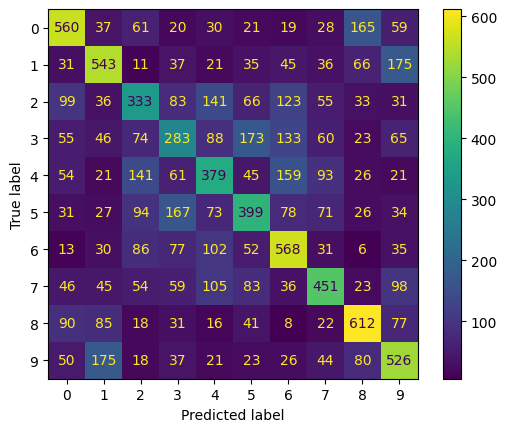

In [39]:
# Confusion Matrix'i elde edin ve yazdırın
cm = confusion_matrix(y_test_flat, y_pred,labels=rf_classifier.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()

In [40]:
from skimage.color import rgb2gray
# Görüntüleri 0-1 aralığına getirerek normalizasyon yapalım
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Renkli görüntüleri siyah-beyaz (grayscale) dönüştürelim
X_train_gray = np.array([rgb2gray(image) for image in x_train])
X_test_gray = np.array([rgb2gray(image) for image in x_test])

# Verileri işlenmiş hale getirme
X_train_clean = []
X_test_clean = []

for image in X_train_gray:
    # Görüntüleri siyah-beyaz yaparak tek bir renk tonlamasına dönüştürelim
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value

    # Dümdüz hale getirilmiş görüntüleri X_train_clean listesine ekle
    X_train_clean.append(binary_image.flatten())

for image in X_test_gray:
    # Görüntüleri siyah-beyaz yaparak tek bir renk tonlamasına dönüştür
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value

    # Dümdüz hale getirilmiş görüntüleri X_test_clean listesine ekle
    X_test_clean.append(binary_image.flatten())

X_train_clean = np.array(X_train_clean)
X_test_clean = np.array(X_test_clean)

# Hedef değişkenleri ravel() fonksiyonuyla yeniden şekillendirme
y_train_flat = y_train.ravel()
y_test_flat = y_test.ravel()

# Random Forest sınıflandırıcıyı oluştur
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Sınıflandırıcıyı eğit
rf_classifier.fit(X_train_clean, y_train_flat)

# Modeli değerlendir
y_pred = rf_classifier.predict(X_test_clean)
accuracy = accuracy_score(y_test_flat, y_pred)
print("accuracy : ", accuracy)
# Modeli değerlendir
f1 = f1_score(y_test_flat, y_pred, average='weighted')
print("F1 skoru : ", f1)


accuracy :  0.3735
F1 skoru :  0.3706022804916992


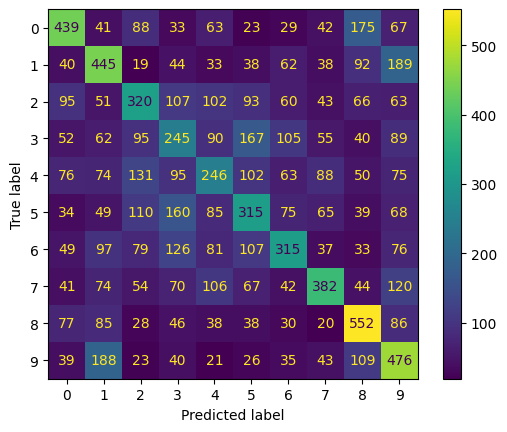

In [41]:
# Confusion Matrix'i elde edin ve yazdırın
cm = confusion_matrix(y_test_flat, y_pred,labels=rf_classifier.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_classifier.classes_)
disp.plot()